In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
DATA_PATH = "Fertilizer Prediction.csv"

In [6]:
data = pd.read_csv("Fertilizer Prediction.csv")
data.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


Exploring the dataset

In [7]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [8]:
data.shape

(99, 9)

In [9]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [10]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

Univariate Analysis

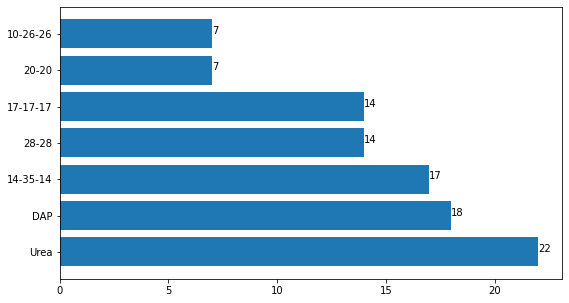

In [11]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

In [12]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

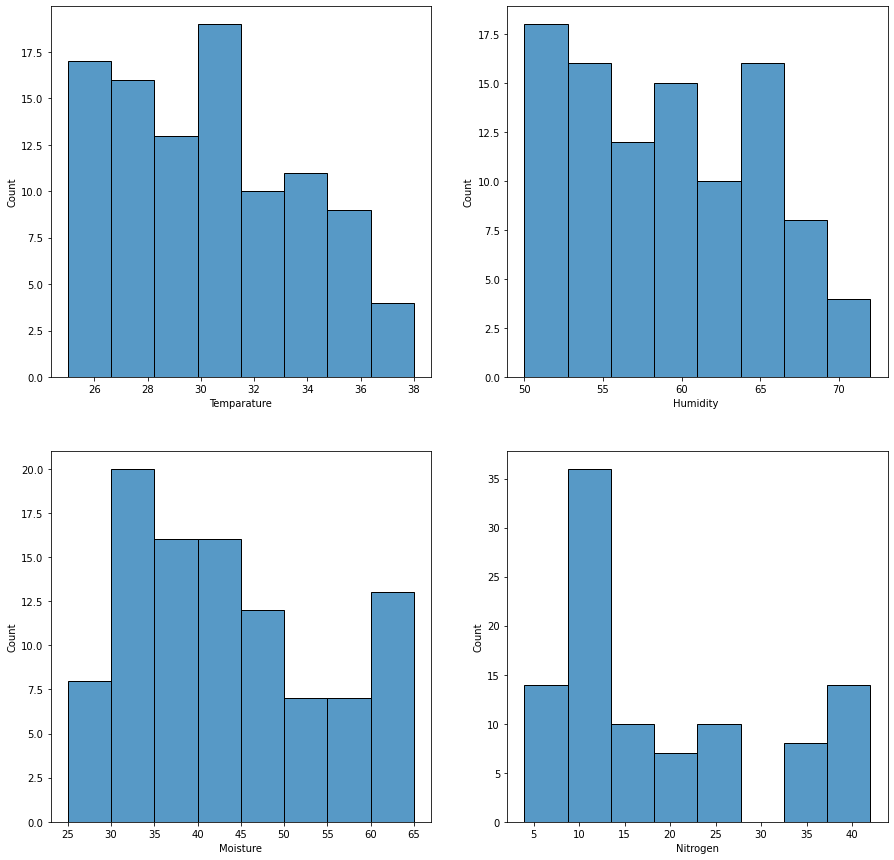

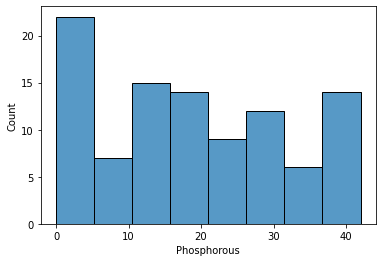

In [13]:
plt.figure(figsize=(15,15))
i = 1
for column in continuous_data_cols[:-1]:
    plt.subplot(2,2,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[continuous_data_cols[-1]])
plt.show()

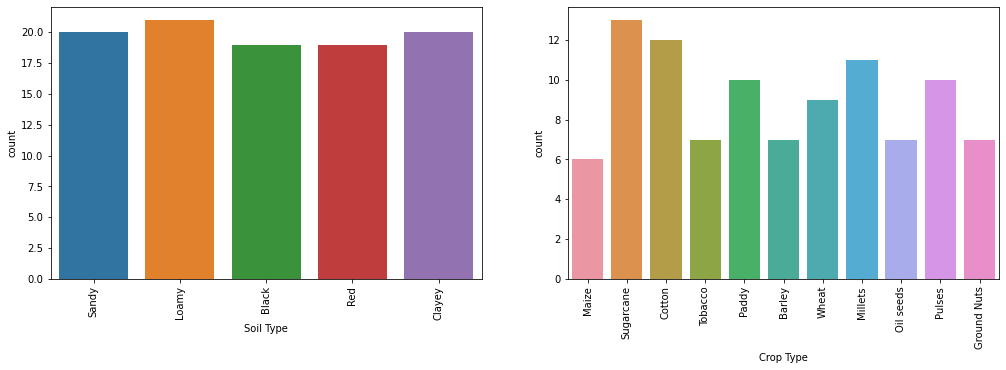

In [14]:
plt.figure(figsize=(17,5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1,2,i)
    sns.countplot(data[column])
    plt.xticks(rotation = 90)
    i+=1
plt.show()

Bivariate Analysis

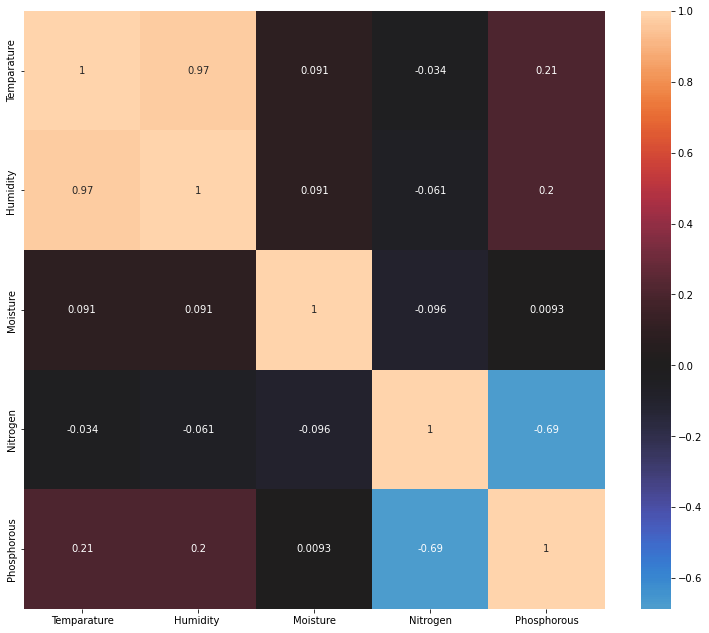

In [15]:
plt.figure(figsize = (13,11))
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()

In [16]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [17]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [18]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [19]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [20]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [21]:
data.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
5,26,52,35,4,0,12,10,13,2
6,25,50,64,3,1,9,0,10,3
7,33,64,50,2,10,41,0,0,6
8,30,60,42,4,4,21,0,18,4
9,29,58,33,0,5,9,7,30,1


In [22]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

Unsampling Data

In [23]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [24]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [25]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


SVM Classifier

Accuracy on Test Data: 100.0%


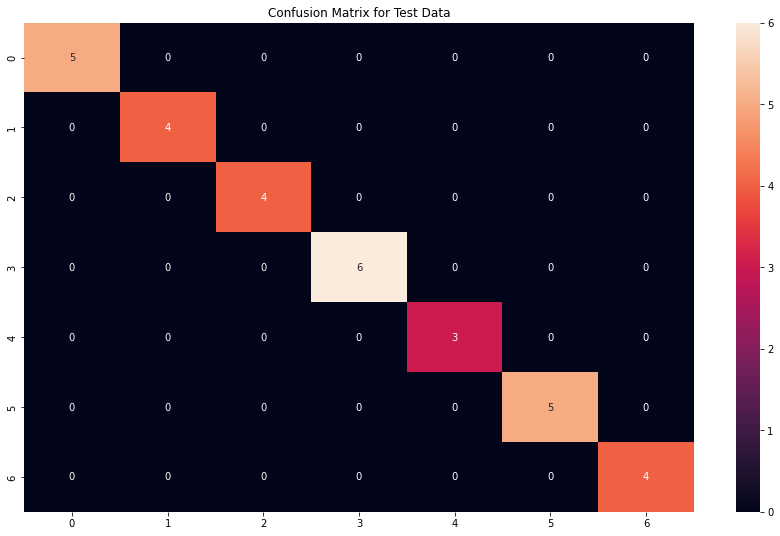




Accuracy on Whole Data: 100.0%


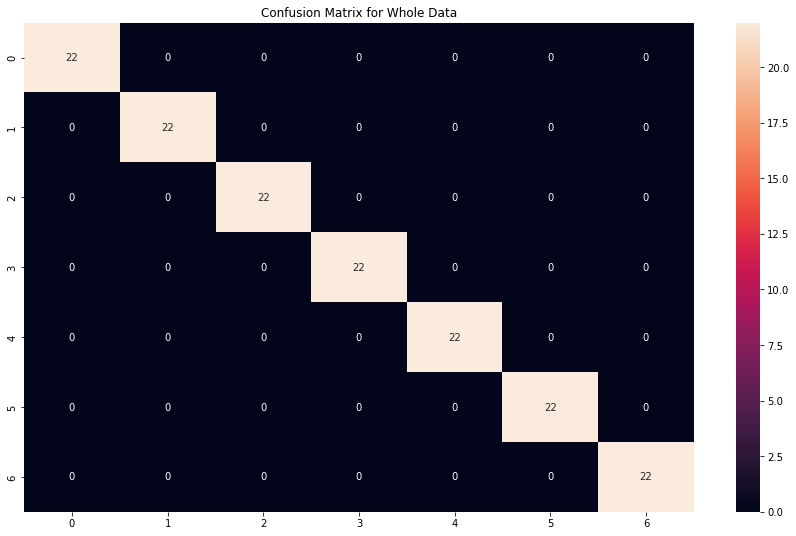

In [27]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()
print()
print()
# Accuray On Whole Data
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [40]:
st = np.array([[30, 60, 63,  3,  1,  9,  9, 29]])
st
predictions = svm_pipeline.predict(st)
pt=predictions[0]
print((fertname_dict[pt]))


14-35-14


In [36]:
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [39]:
print((fertname_dict[1]))

14-35-14


In [29]:
X_test

array([[30, 60, 63,  3,  1,  9,  9, 29],
       [29, 58, 61,  2,  1, 11,  0, 38],
       [27, 54, 29,  1,  6, 13,  0, 39],
       [25, 50, 38,  1,  7,  6, 18, 17],
       [33, 64, 39,  1,  6, 13,  0, 10],
       [33, 64, 50,  2, 10, 41,  0,  0],
       [35, 67, 42,  4,  0, 10,  0, 35],
       [25, 51, 36,  1,  7,  6, 16, 19],
       [34, 65, 54,  2, 10, 38,  0,  0],
       [28, 56, 30,  1,  4,  9,  7, 30],
       [26, 52, 33,  1,  7, 13,  0, 13],
       [35, 67, 28,  1,  7,  8,  7, 31],
       [31, 62, 48,  1,  6, 11, 13, 13],
       [31, 62, 63,  3,  1, 11, 12, 15],
       [32, 62, 48,  2,  6,  9, 18, 17],
       [27, 54, 30,  1,  7, 13,  0, 13],
       [36, 68, 38,  4,  0,  7,  9, 30],
       [31, 62, 60,  2,  2, 10, 12, 14],
       [31, 62, 32,  3,  9, 39,  0,  0],
       [31, 62, 60,  2,  2, 10, 12, 14],
       [36, 60, 43,  4,  4, 15,  0, 41],
       [30, 60, 42,  4,  4, 21,  0, 18],
       [32, 63, 38,  1,  5, 12,  0, 10],
       [31, 61, 45,  1,  7, 23,  0, 18],
       [37, 70, 

In [28]:
#save the model
pickle.dump(svm_pipeline, open("svm_pipeline.pkl", "wb")) 

In [43]:
loaded_model = pickle.load(open("svm_pipeline.pkl", 'rb'))
sipt = np.array([[36, 60, 43,  4,  4, 15,  0, 41]])
predd = loaded_model.predict(sipt)
predicted_Fertizer=predd[0]
print((fertname_dict[predicted_Fertizer]))


DAP
